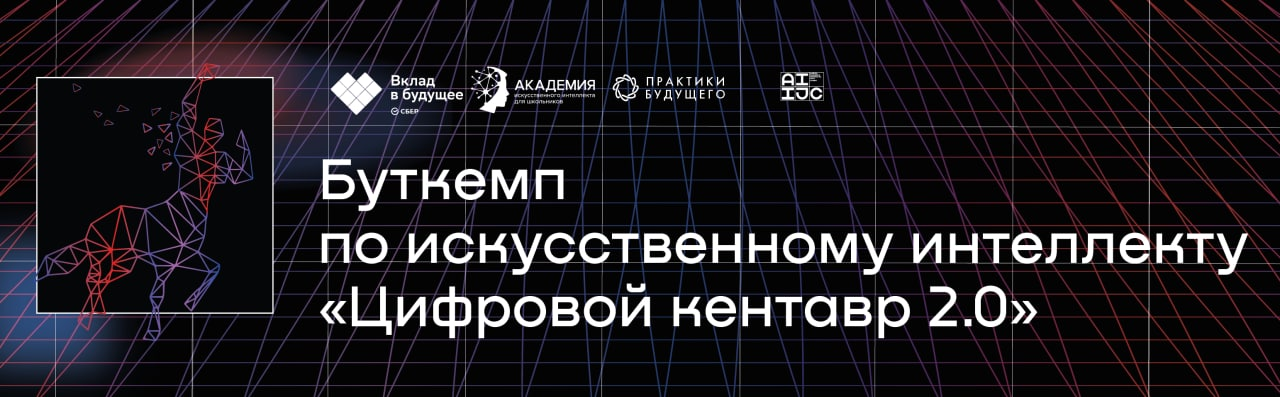

# Решающие деревья

Дерево решений — это популярный алгоритм машинного обучения, который можно представить как набор узлов, в каждом из которых принимается решение по одной из переменных, и оно определяет следующий шаг алгоритма.

В машинном обучении дерево решений — это серия да/нет-вопросов о входных данных. В основе алгоритма лежит структура данных «дерево», её пример на картинке ниже:

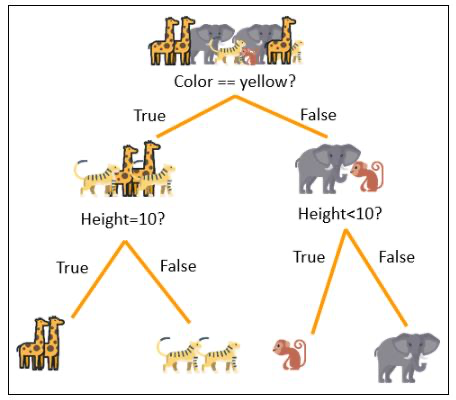

У любого дерева есть корень — это начальный узел. Из этого узла выходят ветви (или ребра), но в него ничего не входит.

Корень — это самая верхняя точка. Промежуточные вершины — это узлы, которые имеют входящие и выходящие ребра. Листья — это «тупиковые» узлы, из них не выходят новые ребра. На рисунке все листья находятся внизу рисунка. Глубина дерева — это максимальный уровень дерева. Уровень конкретного узла определяется количеством узлов между этим узлом и корнем. На нашем рисунке глубина дерева равна 2.

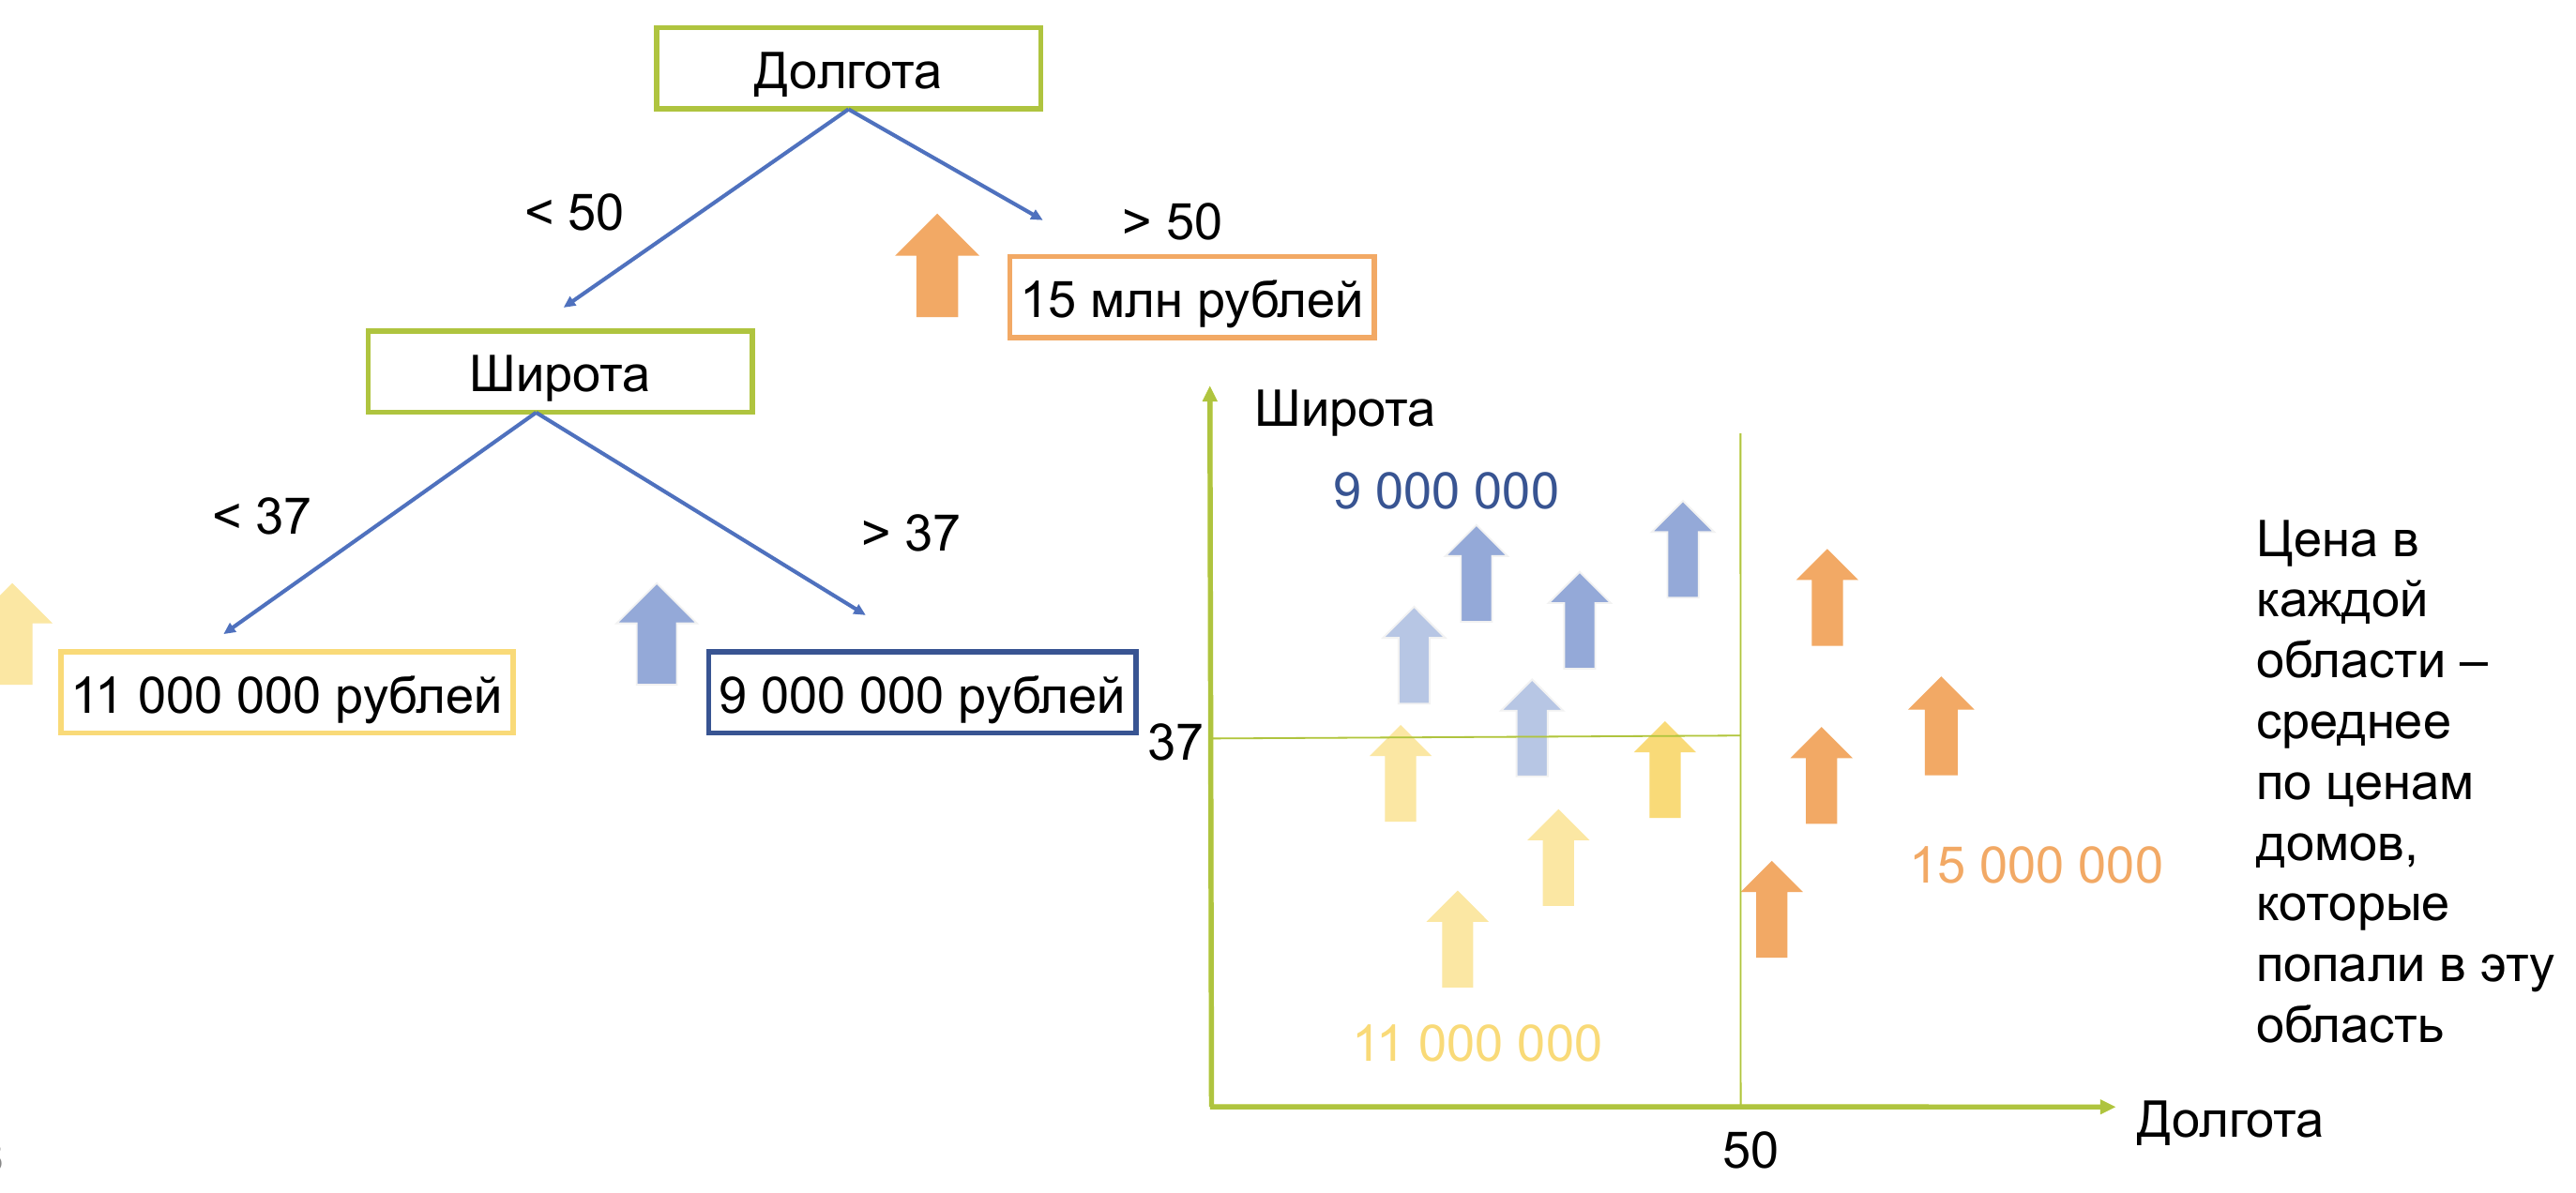

# Как построить дерево решений?

Обычно наши данные описываются набором признаков, на основании которых мы должны принять решение. Но как определить с чего начать, какой признак выбрать первым?

image alt >< wine-TD-2.svg

## Энтропийный критерий

Энтропия — мера хаотичности, неупорядоченности в некоторой системе.
В машинном обучении мы работаем с событиями и вероятностью, поэтому для вычисления энтропии подходит формула Клода Шеннона. Энтропия Шеннона или, по-другому, информационная энтропия определяется так:

$$S = - \sum_{(i=1)}^{N}p_ilog_2p_i$$

В формуле:
      $p_i$ — вероятности нахождения системы в $i$-ом состоянии;
      $N$ — это количество возможных состояний системы, то есть количество возможных значений целевой переменной.

Энтропия по формуле Шеннона является средней характеристикой — математическим ожиданием распределения состояний системы. Когда строится дерево, система рассчитывает энтропию на каждом шаге, чтобы правильно выбрать признак, по которому стоит разделить данные.

Один из критериев — жадная максимизация прироста информации: на каждом шаге выбирается признак, разделение по которому принесёт наибольший прирост информации.

## Неопределенность Джини (Gini Impurity)

В алгоритме ответы должны вести к уменьшению этого показателя. Как именно? Дерево решений формирует узлы с большим количеством образцов одного класса, и алгоритм пытается обнаружить параметры со сходными значениями.

Чтобы вычислить неопределенность Джини, понадобится её формула:

$$G = 1 - \sum_k (p_k)^2$$

$p_k$ - это доля объектов класса $k$ в узле

Если в узле сейчас находятся объекты только одного класса, то неопределенность равна 0.

Работа с этим критерием аналогична интерпретации энтропии: на каждом шаге нужно постараться уменьшить показатель. На практике критерии неопределенности Джини и прирост информации работают почти одинаково. Мы всегда хотим уменьшить вероятность некорректного определения класса для любой части нашего датасета.

$$S = - \sum_{(i=1)}^{N}p_ilog_2p_i \qquad G = 1 - \sum_k (p_k)^2$$ 

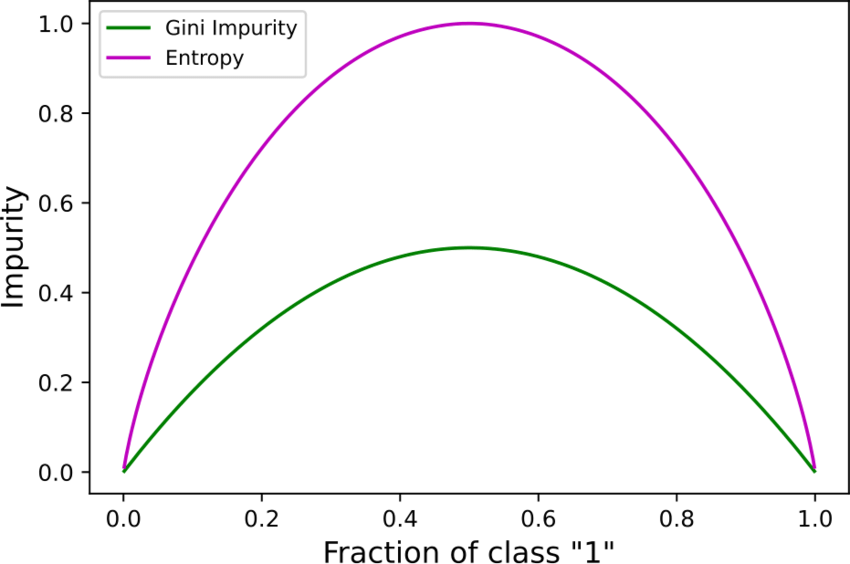

# Ирисы

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [10]:
import pandas as pd
data = pd.DataFrame(iris.data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

In [11]:
target = pd.DataFrame(iris.target, columns = ['class label'])

In [12]:
# from sklearn.datasets import load_iris
from sklearn import tree

X, y = data, target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [15]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


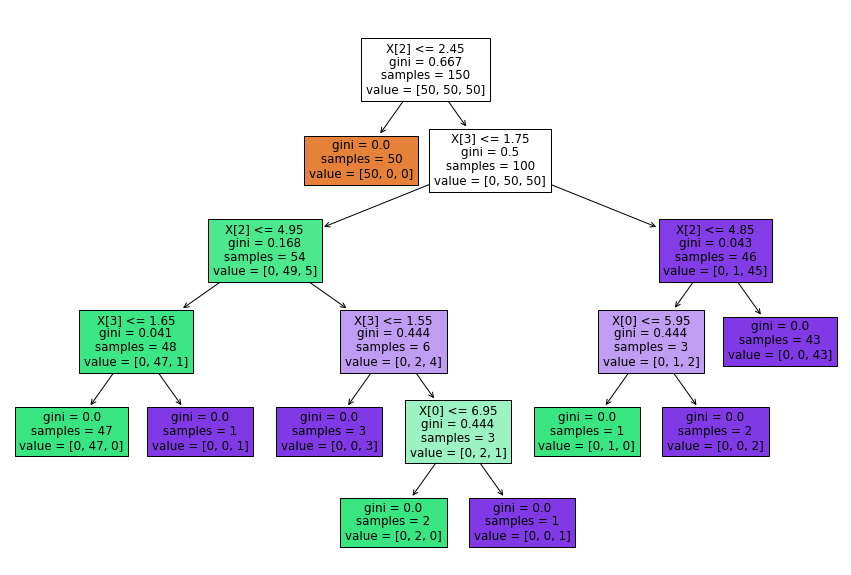

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features", fontsize=14, color='white')
plt.show()

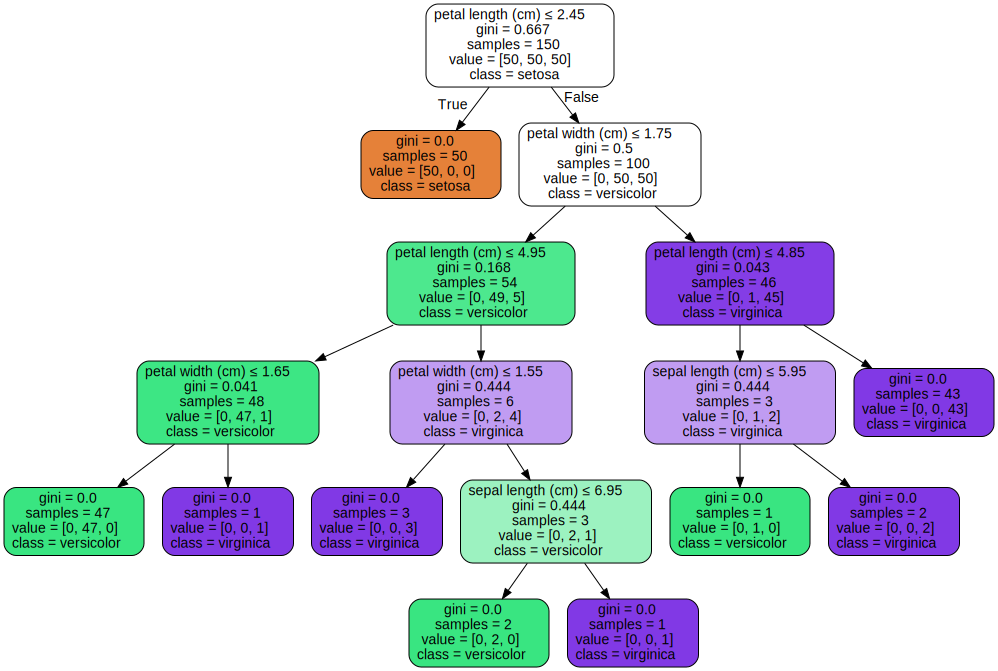

In [17]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

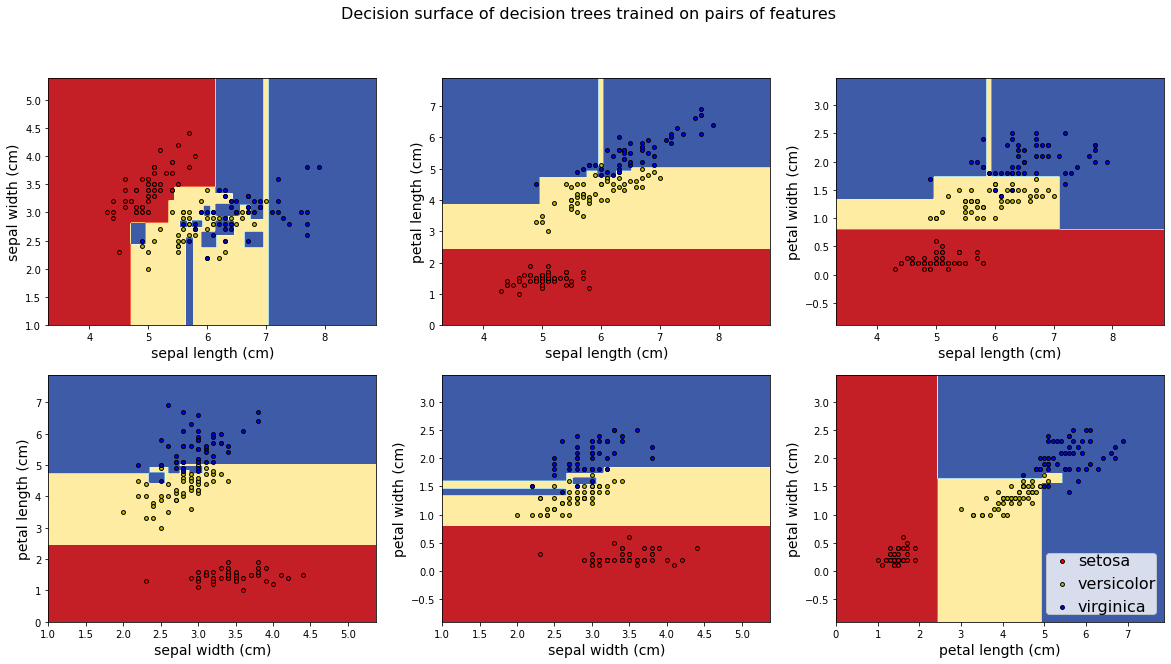

In [18]:
import numpy as np

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(20, 10))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    
    plt.subplot(2, 3, pairidx + 1, )

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    # plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]], fontsize=14)
    plt.ylabel(iris.feature_names[pair[1]], fontsize=14)

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features", fontsize=16)
plt.legend(loc="lower right", borderpad=0, handletextpad=0, fontsize=16);
# _ = plt.axis("tight")

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

In [20]:
import pandas as pd
pd.Series(y_test).value_counts(True)

2    0.333333
1    0.333333
0    0.333333
dtype: float64

## Дерево решений с неопределенностью Джини

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [22]:
tree_gini = DecisionTreeClassifier(criterion='gini')

In [23]:
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
pred_train = tree_gini.predict(X_train)
pred_test = tree_gini.predict(X_test)

In [25]:
print('train accuracy:', accuracy_score(y_train, pred_train))
print('test accuracy:', accuracy_score(y_test, pred_test))

train accuracy: 0.9904761904761905
test accuracy: 0.9333333333333333


## Дерево решений с энтропией

In [26]:
tree_entr = DecisionTreeClassifier(criterion='entropy')
tree_entr.fit(X_train, y_train)

pred_train = tree_entr.predict(X_train)
pred_test = tree_entr.predict(X_test)

print('train accuracy:', accuracy_score(y_train, pred_train))
print('test accuracy:', accuracy_score(y_test, pred_test))

train accuracy: 0.9904761904761905
test accuracy: 0.9333333333333333


## Дерево решений с максимальной глубиной 1

In [27]:
tree_1 = DecisionTreeClassifier(max_depth=1)
tree_1.fit(X_train, y_train)

pred_train = tree_1.predict(X_train)
pred_test = tree_1.predict(X_test)

print('train accuracy:', accuracy_score(y_train, pred_train))
print('test accuracy:', accuracy_score(y_test, pred_test))

train accuracy: 0.6666666666666666
test accuracy: 0.6666666666666666


## Дерево решений с максимальной глубиной 3

In [28]:
tree_3 = DecisionTreeClassifier(max_depth=3)
tree_3.fit(X_train, y_train)

pred_train = tree_3.predict(X_train)
pred_test = tree_3.predict(X_test)

print('train accuracy:', accuracy_score(y_train, pred_train))
print('test accuracy:', accuracy_score(y_test, pred_test))

train accuracy: 0.9809523809523809
test accuracy: 0.9777777777777777


## Дерево решений с максимальной глубиной 5

In [29]:
tree_5 = DecisionTreeClassifier(max_depth=5)
tree_5.fit(X_train, y_train)

pred_train = tree_5.predict(X_train)
pred_test = tree_5.predict(X_test)

print('train accuracy:', accuracy_score(y_train, pred_train))
print('test accuracy:', accuracy_score(y_test, pred_test))

train accuracy: 0.9904761904761905
test accuracy: 0.9333333333333333


### Визуализируем деревья разной глубины

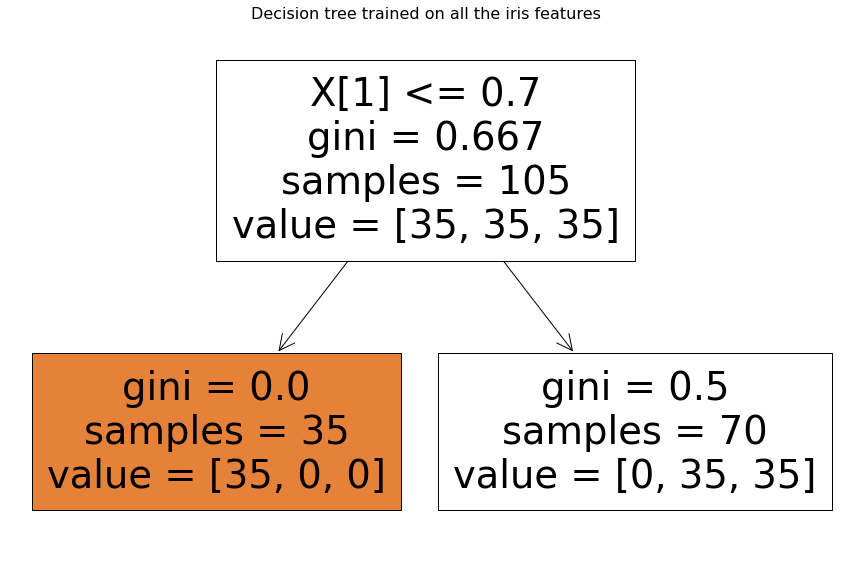

In [30]:
plt.figure(figsize=(15, 10))
plot_tree(tree_1, filled=True)
plt.title("Decision tree trained on all the iris features", fontsize=16)
plt.show()

# Ансамбли моделей

### Мудрость толпы

В основе алгоритма на основе ансамбля моделей лежит простой принцип — мудрость толпы. Фрэнсис Гальтон в 1906 году посетил рынок, где проводилась лотерея для крестьян. Их собралось около 800 человек, все пытались угадать вес быка, который стоял перед ними. Бык весил 1198 фунтов. Ни один крестьянин не угадал точный вес быка, но если посчитать среднее от их предсказаний, то получилось бы 1197 фунтов. Эту идею уменьшения ошибки и взяли на вооружение в машинном обучении.

В интеллектуальных телешоу работает тот же принцип. Статистика игры «Кто хочет стать миллионером?» показывает, что с подсказкой «звонок другу» правильный ответ был выбран лишь в 65% случаев, а если игрок выбирал помощь зала, ответ большинства был верным в 91% случаев.

На принципе мудрости толпы строится и идея случайного леса: одно дерево легко переобучить, а когда решение принимают сразу несколько деревьев, то и ответ получается более верным.


* В задачах регрессии предсказания всех моделей в ансамбле усредняют и получают итоговый ответ.
* В задачах классификации еще проще — за окончательный ответ берем мнение большинства.

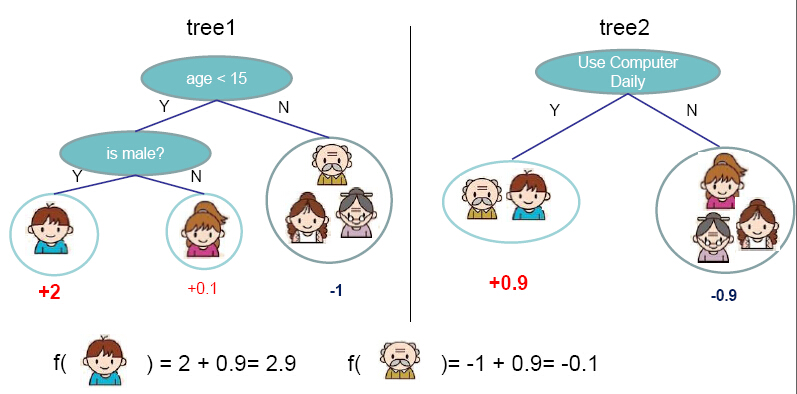

### Случайный лес

Запомнить проще простого: объединение нескольких алгоритмов-деревьев называют «лес». Приглашаем «прогуляться» по такому лесу и узнать, как он работает.

Случайный лес (Random Forest) — это алгоритм машинного обучения. Он решает самые разные задачи: классификации, регрессии, кластеризации и другие.

Случайный лес состоит из большого числа решающих деревьев, они работают в «ансамбле». Если у нас задача классификации, то используем классификатор Random Forest. Каждое дерево предсказывает класс, и тот класс, за который «проголосует» большинство деревьев, будет ответом классификатора.

Что же случайного в этом лесу?

Если мы будем строить все деревья на одних и тех же данных, то они получатся одинаковыми и не никакого эффекта от усреднения не будет. Для того чтобы наши классификаторы были разными, мы будем использовать случайную подвыборку из выборки для обучения и случайный набор фичей из имеющихся. Таким образом наши дерьвья в ансамбле будут разнообразными.

# Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Загружаем данные

Будем использовать встроенный датасет о диабете

In [33]:
# Загружаем датасет
dataset = fetch_california_housing()


Attribute Information:

        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

In [34]:
data = pd.DataFrame(data=dataset['data'], columns = dataset['feature_names'])
target = dataset['target']

In [35]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [36]:
target[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

### Деление данных на train/test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.3)

### Обучение модели

In [8]:
rf = RandomForestRegressor(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

### Оценка качества модели

In [39]:
print('Train MSE:', mean_squared_error(y_train, rf.predict(X_train)))
print('Validation MSE:', mean_squared_error(y_test, rf.predict(X_test)))

Train MSE: 0.05811523872632017
Validation MSE: 0.2600538687971281


### Отбор признаков

Одна из задач, которую RF умеет решать и очень неплохо - это отбор признаков

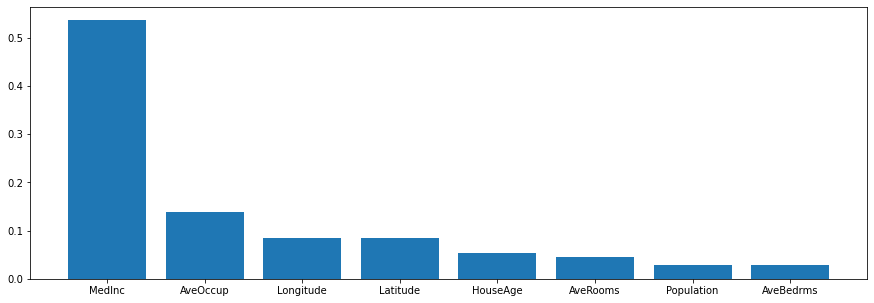

In [40]:
# Упорядычиваем наши фичи по значениям весов, от самой полезной к самой бесполезной
df_importances= sorted(list(zip(data.columns, rf.feature_importances_.ravel())), key=lambda tpl: tpl[1], reverse=True)

# Создаем табличку, в которой будет показан признак и его вес
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance']) 

# Нумируем колонки, чтобы не путать их
df_importances = df_importances.set_index('feature')

# Создаем график, чтобы было нагляднее
plt.figure(figsize=(15, 5))
plt.bar(df_importances.index, df_importances['importance'])

# Рисуем график
plt.show()

In [41]:
rf.feature_importances_

array([0.53675547, 0.05326755, 0.04501213, 0.02758317, 0.02925496,
       0.13858265, 0.08477196, 0.0847721 ])

### Посмотрим на результат при использовании модели линейной регресии

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print('Train MSE:', mean_squared_error(y_train, lin_reg.predict(X_train)))
print('Validation MSE:', mean_squared_error(y_test, y_pred))

Train MSE: 0.5233576288267754
Validation MSE: 0.5305677824766752
